In [1]:
# Libraries
import pandas as pd
import networkx as nx
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
from networkx.algorithms.link_analysis.pagerank_alg import pagerank

In [2]:
# Data
before_data = pd.read_csv("../Data/backbone_graphs/before_campaign_backbone.csv")
during_data = pd.read_csv("../Data/backbone_graphs/during_campaign_backbone.csv")
after_data = pd.read_csv("../Data/backbone_graphs/after_elections_backbone.csv")

# Some stats
print("before_data has shape: ", before_data.shape)
print("during_data has shape: ", during_data.shape)
print("after_data has shape: ", after_data.shape)

before_data has shape:  (38209, 4)
during_data has shape:  (56953, 4)
after_data has shape:  (42864, 4)


In [3]:
# Insights
before_data

,source,target,weight,p_value
0,3241806322,29416653,132,3.150182e-51
1,29416653,389131517,38,1.914250e-14
2,29416653,169566296,27,1.061201e-07
3,29416653,1342502335361273856,22,2.116990e-06
4,29416653,3308422191,20,6.992131e-06
...,...,...,...,...
38204,127532707,2301639524,4,4.440879e-02
38205,1489925735401799680,1391451476761923584,4,4.074783e-02
38206,434505068,3005727892,4,4.212454e-02
38207,1586682241,1071557549391011840,4,4.259258e-02


In [4]:
# Creating graphs
before_graph = nx.from_pandas_edgelist(before_data,
                                       source="source",
                                       target="target",
                                       edge_attr='weight',
                                       create_using=nx.DiGraph())

during_graph = nx.from_pandas_edgelist(during_data,
                                       source="source",
                                       target="target",
                                       edge_attr='weight',
                                       create_using=nx.DiGraph())

after_graph = nx.from_pandas_edgelist(after_data,
                                       source="source",
                                       target="target",
                                       edge_attr='weight',
                                       create_using=nx.DiGraph())

# Some stats
print("before_graph has ", before_graph.number_of_nodes(), " nodes and ", before_graph.number_of_edges(), " edges")
print("during_graph has ", during_graph.number_of_nodes(), " nodes and ", during_graph.number_of_edges(), " edges")
print("after_graph has ", after_graph.number_of_nodes(), " nodes and ", after_graph.number_of_edges(), " edges")

before_graph has  12008  nodes and  38209  edges
during_graph has  18150  nodes and  56953  edges
after_graph has  15943  nodes and  42864  edges


In [5]:
# Reading representatives data
representatives_data = pd.read_csv("../Data/twitter_representatives_handles_final.csv", dtype=str)

# Dropping the first 5 columns
representatives_data = representatives_data.drop(columns=representatives_data.columns[:5])

# Storing IDs and setting them as index
representative_IDs = representatives_data["ids"].tolist()
representatives_data = representatives_data.set_index("ids")

representatives_data.head()

,Name,Twitter-Handle,Party,Gender
ids,,,,
425752285,Bonelli Angelo,AngeloBonelli1,Alleanza Verdi Sinistra,M
417961167,Borrelli Francesco Emilio,NotizieFrance,Alleanza Verdi Sinistra,M
1228450685840220160,Dori Devis,DevisDori,Alleanza Verdi Sinistra,M
1135141640,Evi Eleonora,EleonoraEvi,Alleanza Verdi Sinistra,F
425686235,Fratoianni Nicola,NFratoianni,Alleanza Verdi Sinistra,M


In [7]:
pagerank(before_graph, weight='weight')

{3241806322: 6.218863134129835e-05,
 29416653: 0.00011522368100838973,
 389131517: 7.34137118530866e-05,
 169566296: 6.953627168770954e-05,
 1342502335361273856: 7.576279924057995e-05,
 3308422191: 9.8488527834048e-05,
 377596180: 6.599851892832638e-05,
 993804838705213440: 0.00010614906821737686,
 947262590: 8.031749584370396e-05,
 1163020839605985280: 7.58133016964319e-05,
 3676549834: 6.599851892832638e-05,
 1440784603: 7.566216697521836e-05,
 2447546724: 6.51821144453918e-05,
 1293469620909809664: 6.641126023955735e-05,
 1103360481341902848: 0.00010515730515473665,
 723898926: 9.781581665032989e-05,
 2848115296: 6.604626341276978e-05,
 1497243827207290880: 7.498076311461175e-05,
 1015965682742284288: 7.842641486801573e-05,
 608125539: 6.97142850095804e-05,
 1493109716792356864: 7.975692869632722e-05,
 2606389745: 0.00012328408537238799,
 172028905: 7.008154795752868e-05,
 1511507618992377856: 6.754170566383349e-05,
 270050737: 7.439110360391958e-05,
 1491122529024552960: 6.35493054

In [8]:
# Computing pagerank distribution for each graph
# This method returns a dictionary {node: pagerank}
before_pagerank = {str(k): v for k,v in pagerank(before_graph, weight='weight').items()}
during_pagerank = {str(k): v for k,v in pagerank(during_graph, weight='weight').items()}
after_pagerank = {str(k): v for k,v in pagerank(after_graph, weight='weight').items()}

### How is the PageRank distributed for representatives?

In [10]:
# Getting only the pageranks of the representatives
before_representatives_pagerank = {k: before_pagerank[k] for k in before_pagerank if k in representative_IDs}
during_representatives_pagerank = {k: during_pagerank[k] for k in during_pagerank if k in representative_IDs}
after_representatives_pagerank = {k: after_pagerank[k] for k in after_pagerank if k in representative_IDs}

print("Representatives found before campaign: ", len(before_representatives_pagerank))
print("Representatives found during campaign: ", len(during_representatives_pagerank))
print("Representatives found after elections: ", len(after_representatives_pagerank))
print("\n")

# Getting the average pagerank
before_representatives_avg_pagerank = np.mean(list(before_representatives_pagerank.values())) if len(before_representatives_pagerank) > 0 else 0
during_representatives_avg_pagerank = np.mean(list(during_representatives_pagerank.values())) if len(during_representatives_pagerank) > 0 else 0
after_representatives_avg_pagerank = np.mean(list(after_representatives_pagerank.values())) if len(after_representatives_pagerank) > 0 else 0

# Getting the median pagerank
before_representatives_median_pagerank = np.median(list(before_representatives_pagerank.values())) if len(before_representatives_pagerank) > 0 else 0
during_representatives_median_pagerank = np.median(list(during_representatives_pagerank.values())) if len(during_representatives_pagerank) > 0 else 0
after_representatives_median_pagerank = np.median(list(after_representatives_pagerank.values())) if len(after_representatives_pagerank) > 0 else 0

# Getting the max pagerank
before_representatives_max_pagerank = max(list(before_representatives_pagerank.values())) if len(before_representatives_pagerank) > 0 else 0
during_representatives_max_pagerank = max(list(during_representatives_pagerank.values())) if len(during_representatives_pagerank) > 0 else 0
after_representatives_max_pagerank = max(list(after_representatives_pagerank.values())) if len(after_representatives_pagerank) > 0 else 0

# Getting the std pagerank (this would suggest the flatness of the distribution or the presence of hierarchy)
before_representatives_std_pagerank = np.std(list(before_representatives_pagerank.values())) if len(before_representatives_pagerank) > 0 else 0
during_representatives_std_pagerank = np.std(list(during_representatives_pagerank.values())) if len(during_representatives_pagerank) > 0 else 0
after_representatives_std_pagerank = np.std(list(after_representatives_pagerank.values())) if len(after_representatives_pagerank) > 0 else 0

# Printing the results
print("Before campaign: ")
print("Average pagerank: ", round(before_representatives_avg_pagerank, 3))
print("Median pagerank: ", round(before_representatives_median_pagerank, 3))
print("Max pagerank: ", before_representatives_max_pagerank)
print("Std pagerank: ", round(before_representatives_std_pagerank, 3))
print("-"*50)

print("During campaign: ")
print("Average pagerank: ", round(during_representatives_avg_pagerank, 3))
print("Median pagerank: ", round(during_representatives_median_pagerank, 3))
print("Max pagerank: ", during_representatives_max_pagerank)
print("Std pagerank: ", round(during_representatives_std_pagerank, 3))
print("-"*50)

print("After elections: ")
print("Average pagerank: ", round(after_representatives_avg_pagerank, 3))
print("Median pagerank: ", round(after_representatives_median_pagerank, 3))
print("Max pagerank: ", after_representatives_max_pagerank)
print("Std pagerank: ", round(after_representatives_std_pagerank, 3))


Representatives found before campaign:  100
Representatives found during campaign:  149
Representatives found after elections:  93


Before campaign: 
Average pagerank:  0.0
Median pagerank:  0.0
Max pagerank:  0.0015053815190795177
Std pagerank:  0.0
--------------------------------------------------
During campaign: 
Average pagerank:  0.0
Median pagerank:  0.0
Max pagerank:  0.0017184422266903266
Std pagerank:  0.0
--------------------------------------------------
After elections: 
Average pagerank:  0.0
Median pagerank:  0.0
Max pagerank:  0.001499163974832402
Std pagerank:  0.0


### How did the representatives' relevance changed within the periods?

In [19]:
# Getting representatives for each period
before_representatives_set = set(before_representatives_pagerank.keys())
during_representatives_set = set(during_representatives_pagerank.keys())
after_representatives_set = set(after_representatives_pagerank.keys())

# Debug
print("Representatives found before campaign: ", len(before_representatives_set))
print("Representatives found during campaign: ", len(during_representatives_set))
print("Representatives found after elections: ", len(after_representatives_set))

# Representatives that are present in all periods
common_representatives = before_representatives_set.intersection(during_representatives_set).intersection(after_representatives_set)
print("Representatives that are present in all periods: ", len(common_representatives))

# Representatives present in before and during
before_during_representatives = before_representatives_set.intersection(during_representatives_set)
print("Representatives that are present in before and during: ", len(before_during_representatives))

# Representatives present in before and after
before_after_representatives = before_representatives_set.intersection(after_representatives_set)
print("Representatives that are present in before and after: ", len(before_after_representatives))

# Representatives present in during and after
during_after_representatives = during_representatives_set.intersection(after_representatives_set)
print("Representatives that are present in during and after: ", len(during_after_representatives))

Representatives found before campaign:  100
Representatives found during campaign:  149
Representatives found after elections:  93
Representatives that are present in all periods:  68
Representatives that are present in before and during:  86
Representatives that are present in before and after:  71
Representatives that are present in during and after:  86


In [20]:
# Computing the Pearson correlation between the pageranks of the representatives present in all periods
# Getting the pageranks of the common representatives
before_common_representatives_pagerank = {k: before_representatives_pagerank[k] for k in common_representatives}
during_common_representatives_pagerank = {k: during_representatives_pagerank[k] for k in common_representatives}
after_common_representatives_pagerank = {k: after_representatives_pagerank[k] for k in common_representatives}

# Pearson correlation
pearson_before_during = pearsonr(list(before_common_representatives_pagerank.values()), list(during_common_representatives_pagerank.values()))
pearson_before_after = pearsonr(list(before_common_representatives_pagerank.values()), list(after_common_representatives_pagerank.values()))
pearson_during_after = pearsonr(list(during_common_representatives_pagerank.values()), list(after_common_representatives_pagerank.values()))

print("Pearson correlation between before and during: ", pearson_before_during)
print("Pearson correlation between before and after: ", pearson_before_after)
print("Pearson correlation between during and after: ", pearson_during_after)

Pearson correlation between before and during:  PearsonRResult(statistic=0.7303020124189472, pvalue=1.5797337257260583e-12)
Pearson correlation between before and after:  PearsonRResult(statistic=0.4818875677280771, pvalue=3.1725318564228204e-05)
Pearson correlation between during and after:  PearsonRResult(statistic=0.524750657156705, pvalue=4.35590393008328e-06)


In [ ]:
# Computing the average gain in pagerank for the common representatives
# Getting the gain
gain_before_during = {k: during_common_representatives_pagerank[k] - before_common_representatives_pagerank[k] for k in common_representatives}
gain_before_after = {k: after_common_representatives_pagerank[k] - before_common_representatives_pagerank[k] for k in common_representatives}
gain_during_after = {k: after_common_representatives_pagerank[k] - during_common_representatives_pagerank[k] for k in common_representatives}

# Getting the average gain
avg_gain_before_during = np.mean(list(gain_before_during.values()))
avg_gain_before_after = np.mean(list(gain_before_after.values()))
avg_gain_during_after = np.mean(list(gain_during_after.values()))

print("Average gain in pagerank from before to during: ", avg_gain_before_during)
print("Average gain in pagerank from before to after: ", avg_gain_before_after)
print("Average gain in pagerank from during to after: ", avg_gain_during_after)

### Who is the representative that gained most interest during each pair of periods?

In [21]:
# For each representative, computing the gain in pagerank between two periods
gains_before_during = {k: during_representatives_pagerank[k] - before_representatives_pagerank[k] for k in before_during_representatives}
gains_before_after = {k: after_representatives_pagerank[k] - before_representatives_pagerank[k] for k in before_after_representatives}
gains_during_after = {k: after_representatives_pagerank[k] - during_representatives_pagerank[k] for k in during_after_representatives}

# Getting the max gain in pagerank and the representative
max_gain_before_during = max(gains_before_during, key=gains_before_during.get)
max_gain_before_after = max(gains_before_after, key=gains_before_after.get)
max_gain_during_after = max(gains_during_after, key=gains_during_after.get)

print("Max gain in pagerank from before to during: ", max_gain_before_during, representatives_data.loc[max_gain_before_during].Name, gains_before_during[max_gain_before_during])
print("Max gain in pagerank from before to after: ", max_gain_before_after, representatives_data.loc[max_gain_before_after].Name, gains_before_after[max_gain_before_after])
print("Max gain in pagerank from during to after: ", max_gain_during_after, representatives_data.loc[max_gain_during_after].Name, gains_during_after[max_gain_during_after])

Max gain in pagerank from before to during:  616886078 Marattin Luigi 0.0004959916912821046
Max gain in pagerank from before to after:  18762875 Renzi Matteo 0.0005512149830800943
Max gain in pagerank from during to after:  18762875 Renzi Matteo 0.001057129470648795


### And the one that lost most interest during each pair of periods?

In [23]:
# For each representative, getting the one that lost the most in pagerank between two periods
min_gain_before_during = min(gains_before_during, key=gains_before_during.get)
min_gain_before_after = min(gains_before_after, key=gains_before_after.get)
min_gain_during_after = min(gains_during_after, key=gains_during_after.get)

print("Max loss in pagerank from before to during: ", min_gain_before_during, representatives_data.loc[min_gain_before_during].Name, gains_before_during[min_gain_before_during])
print("Max loss in pagerank from before to after: ", min_gain_before_after, representatives_data.loc[min_gain_before_after].Name, gains_before_after[min_gain_before_after])
print("Max loss in pagerank from during to after: ", min_gain_during_after, representatives_data.loc[min_gain_during_after].Name, gains_during_after[min_gain_during_after])

Max loss in pagerank from before to during:  876541483 Bagnai Alberto -0.0013736625992281344
Max loss in pagerank from before to after:  1134357498 Bonetti Elena -0.0013493856540944382
Max loss in pagerank from during to after:  940499085886480384 Cottarelli Carlo -0.0013112946936642545


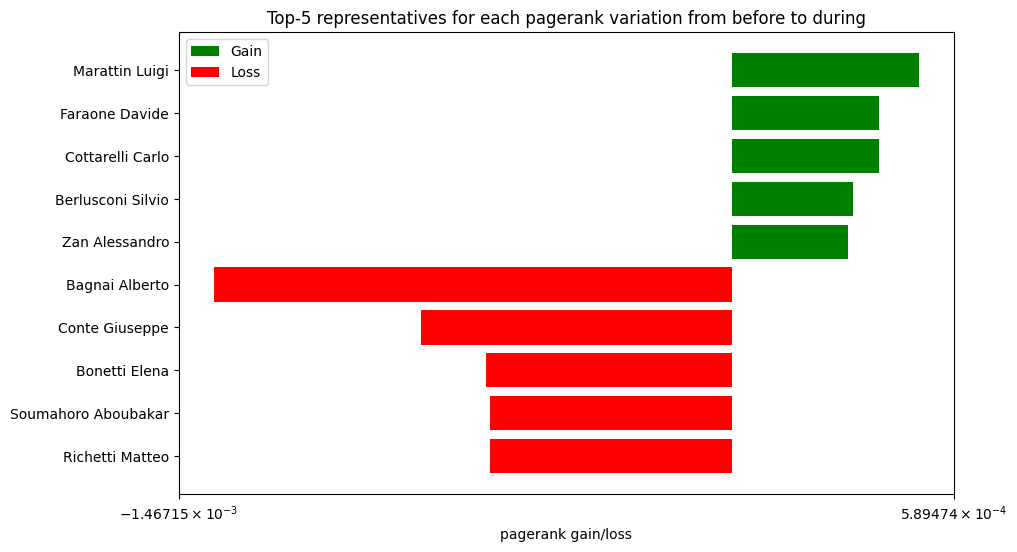

In [24]:
# Getting the top-5 representatives that gained the most in pagerank from before to during
top5_gains_before_during = sorted(gains_before_during.items(), key=lambda x: x[1], reverse=True)[:5]
top5_losses_before_during = sorted(gains_before_during.items(), key=lambda x: x[1])[:5]

# Getting the names and gains
top5_gains_names = [representatives_data.loc[x[0]].Name for x in top5_gains_before_during]
top5_gains_values = [x[1] for x in top5_gains_before_during]

top5_losses_names = [representatives_data.loc[x[0]].Name for x in top5_losses_before_during]
top5_losses_values = [x[1] for x in top5_losses_before_during]

# Plotting
plt.figure(figsize=(10,6))
plt.barh(top5_gains_names, top5_gains_values, color='green', label='Gain')
plt.barh(top5_losses_names, top5_losses_values, color='red', label='Loss')

# Improve the scale of the x-axis
plt.xscale('symlog')

plt.xlabel("pagerank gain/loss")
plt.title("Top-5 representatives for each pagerank variation from before to during")
plt.legend()

# Showing gains before losses
plt.gca().invert_yaxis()

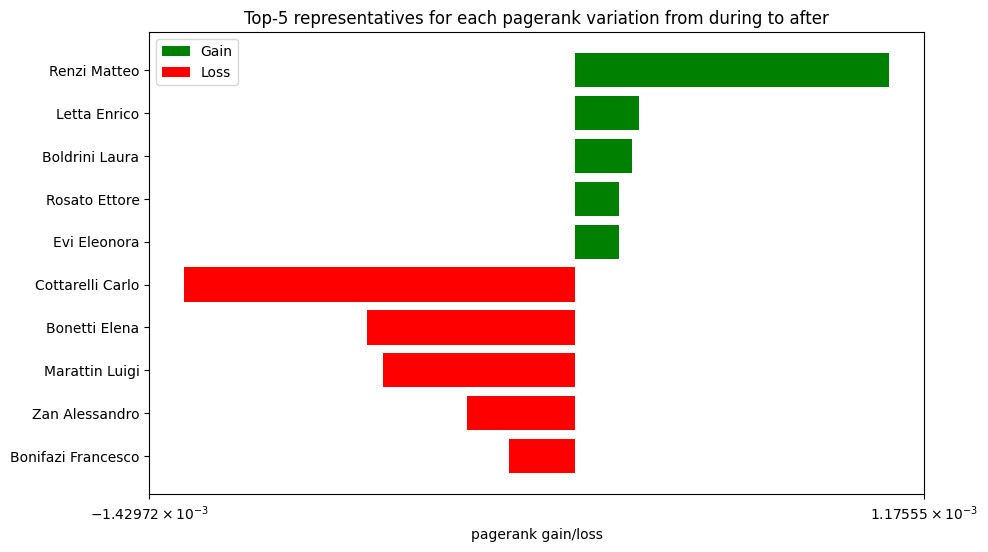

In [25]:
# Getting the top-5 representatives that gained the most in pagerank from during to after
top5_gains_during_after = sorted(gains_during_after.items(), key=lambda x: x[1], reverse=True)[:5]
top5_losses_during_after = sorted(gains_during_after.items(), key=lambda x: x[1])[:5]

# Getting the names and gains
top5_gains_names = [representatives_data.loc[x[0]].Name for x in top5_gains_during_after]
top5_gains_values = [x[1] for x in top5_gains_during_after]

top5_losses_names = [representatives_data.loc[x[0]].Name for x in top5_losses_during_after]
top5_losses_values = [x[1] for x in top5_losses_during_after]

# Plotting
plt.figure(figsize=(10,6))
plt.barh(top5_gains_names, top5_gains_values, color='green', label='Gain')
plt.barh(top5_losses_names, top5_losses_values, color='red', label='Loss')

# Improve the scale of the x-axis
plt.xscale('symlog')

plt.xlabel("pagerank gain/loss")
plt.title("Top-5 representatives for each pagerank variation from during to after")
plt.legend()

# Showing gains before losses
plt.gca().invert_yaxis()

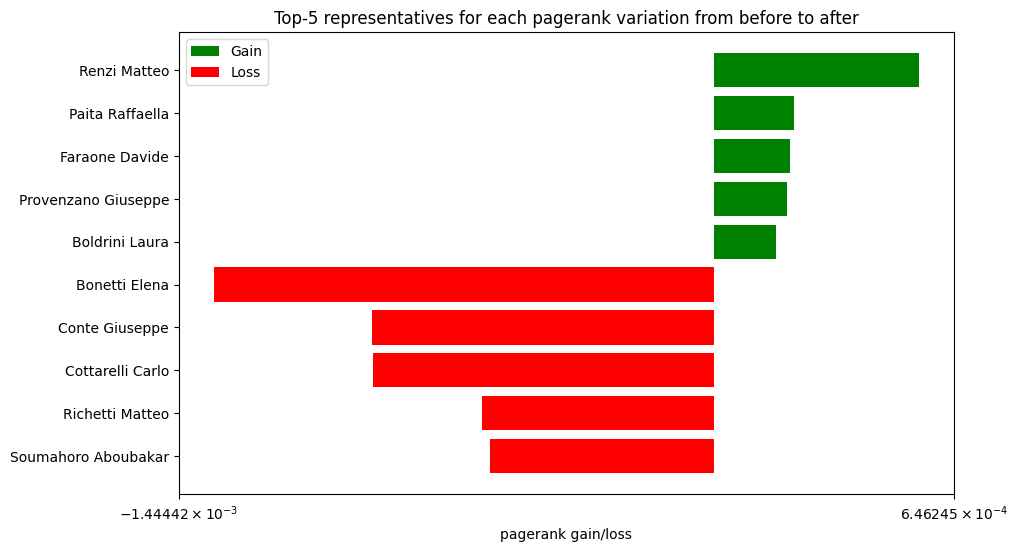

In [26]:
# Getting the top-5 representatives that gained the most in pagerank from before to after
top5_gains_before_after = sorted(gains_before_after.items(), key=lambda x: x[1], reverse=True)[:5]
top5_losses_before_after = sorted(gains_before_after.items(), key=lambda x: x[1])[:5]

# Getting the names and gains
top5_gains_names = [representatives_data.loc[x[0]].Name for x in top5_gains_before_after]
top5_gains_values = [x[1] for x in top5_gains_before_after]

top5_losses_names = [representatives_data.loc[x[0]].Name for x in top5_losses_before_after]
top5_losses_values = [x[1] for x in top5_losses_before_after]

# Plotting
plt.figure(figsize=(10,6))
plt.barh(top5_gains_names, top5_gains_values, color='green', label='Gain')
plt.barh(top5_losses_names, top5_losses_values, color='red', label='Loss')

# Improve the scale of the x-axis
plt.xscale('symlog')

plt.xlabel("pagerank gain/loss")
plt.title("Top-5 representatives for each pagerank variation from before to after")
plt.legend()

# Showing gains before losses
plt.gca().invert_yaxis()